In [1]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(ggthemes)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
!cat <(awk 'BEGIN{OFS="\t"}NR==1{NF--;print $0,"file"}NR>1&&$26=="Arabidopsis_thaliana_Col-0"{NF--;print $0,"promoter"}' /clusterfs/jgi/groups/gentech/homes/romalley/full_DAPseq_annota
tion/raw_data/N4_filtered-annotated-peaks_minfoldch5_minus-2000bp-to-plus-500bp_111623.tsv) <(awk 'BEGIN{OFS="\t"}NR>1&&$26=="Arabidopsis_thaliana_Col-0"{print $0,"genebody"}' /clusterfs/jgi/groups/gentech/homes/romal
ley/full_DAPseq_annotation/raw_data/N4_filtered-annotated-peaks_minfoldch5_genebody_plus_500bpStart-to-plus-600bpStop_111924.tsv) >integrated_Atha_promoter_gb_peak.txt

In [2]:
full_anno_table<- read.table("/clusterfs/jgi/groups/gentech/homes/romalley/full_DAPseq_annotation/analysis/integrated_Atha_promoter_gb_peak.txt",
header=T,sep="\t",comment.char="",quote="\"",stringsAsFactors=F)

In [3]:
labels = read.table('/clusterfs/jgi/groups/gentech/homes/romalley/full_DAPseq_annotation/raw_data/ath-258-tf-info_simple.csv', sep=',', header=T,stringsAsFactors = F)

In [29]:
head(labels,n=3)

,gene_id,tf_family,tf_name,tf_and_fam,representative_category,tf_clade_curated,clade
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>
1,AT5G60130,ABI3VP1,AT5G60130,ABI3VP1_AT5G60130,1,2,ABI3VP1_c2
2,AT4G01500,ABI3VP1,NGA4,ABI3VP1_NGA4,0,1,ABI3VP1_c1
3,AT3G18990,ABI3VP1,VRN1,ABI3VP1_VRN1,2,3,ABI3VP1_c3


In [4]:
subinfo_of_fulltable<- 
full_anno_table[,c("peak_chr","peak_start","peak_end","peak_name","peak_foldch","summit_to_cds_start","summit_to_cds_end","target_id","gene","tf","n_cons_species_minfrac0","annotated_peak_region","file")]

In [5]:
head(subinfo_of_fulltable,n=3)

,peak_chr,peak_start,peak_end,peak_name,peak_foldch,summit_to_cds_start,summit_to_cds_end,target_id,gene,tf,n_cons_species_minfrac0,annotated_peak_region,file
,<chr>,<int>,<int>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
1,Chr3,15645684,15646225,AT1G01060_A_thaliana_Col-0_DAPi709D10-ORGi5005-96P169_peak_8939,121.602,-508,-1614,AT3G43750.1,AT3G43750,AT1G01060,3,upstream,promoter
2,Chr1,1637949,1638542,AT1G01060_A_thaliana_Col-0_DAPi709D10-ORGi5005-96P169_peak_146,115.549,-1171,-2530,AT1G05540.1,AT1G05540,AT1G01060,2,upstream,promoter
3,Chr1,1637949,1638542,AT1G01060_A_thaliana_Col-0_DAPi709D10-ORGi5005-96P169_peak_146,115.549,-314,-1681,AT1G05530.1,AT1G05530,AT1G01060,2,upstream,promoter


In [5]:
subinfo_of_fulltable_2<- 
subinfo_of_fulltable %>%
    mutate(partition_pcg=ifelse(summit_to_cds_start>0 & summit_to_cds_end>0,summit_to_cds_end/600,
    ifelse(summit_to_cds_start<0 & summit_to_cds_end<0,(2000+summit_to_cds_start)/2000,
    summit_to_cds_start/(summit_to_cds_start-summit_to_cds_end)))) %>%
    mutate(peak_location=ifelse(summit_to_cds_start>0 & summit_to_cds_end>0,"downstream",
    ifelse(summit_to_cds_start<0 & summit_to_cds_end<0,"upstream",
    "genebody")))

In [7]:
head(subinfo_of_fulltable_2,n=3)

,peak_chr,peak_start,peak_end,peak_name,peak_foldch,summit_to_cds_start,summit_to_cds_end,target_id,gene,tf,n_cons_species_minfrac0,annotated_peak_region,file,partition_pcg,peak_location
,<chr>,<int>,<int>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<chr>
1,Chr3,15645684,15646225,AT1G01060_A_thaliana_Col-0_DAPi709D10-ORGi5005-96P169_peak_8939,121.602,-508,-1614,AT3G43750.1,AT3G43750,AT1G01060,3,upstream,promoter,0.7460,upstream
2,Chr1,1637949,1638542,AT1G01060_A_thaliana_Col-0_DAPi709D10-ORGi5005-96P169_peak_146,115.549,-1171,-2530,AT1G05540.1,AT1G05540,AT1G01060,2,upstream,promoter,0.4145,upstream
3,Chr1,1637949,1638542,AT1G01060_A_thaliana_Col-0_DAPi709D10-ORGi5005-96P169_peak_146,115.549,-314,-1681,AT1G05530.1,AT1G05530,AT1G01060,2,upstream,promoter,0.8430,upstream


In [7]:
subinfo_of_fulltable_2 %>%
    group_by(tf,n_cons_species_minfrac0,annotated_peak_region) %>%
    summarise(peak_count=n()) %>%
    ungroup()%>%
    head()

`summarise()` has grouped output by 'tf', 'n_cons_species_minfrac0'. You can
override using the `.groups` argument.


tf,n_cons_species_minfrac0,annotated_peak_region,peak_count
<chr>,<int>,<chr>,<int>
AT1G01060,1,cds,102
AT1G01060,1,downstream,504
AT1G01060,1,intron,389
AT1G01060,1,upstream,1327
AT1G01060,1,utr3prime,182
AT1G01060,1,utr5prime,50


`summarise()` has grouped output by 'tf', 'n_cons_species_minfrac0'. You can
override using the `.groups` argument.


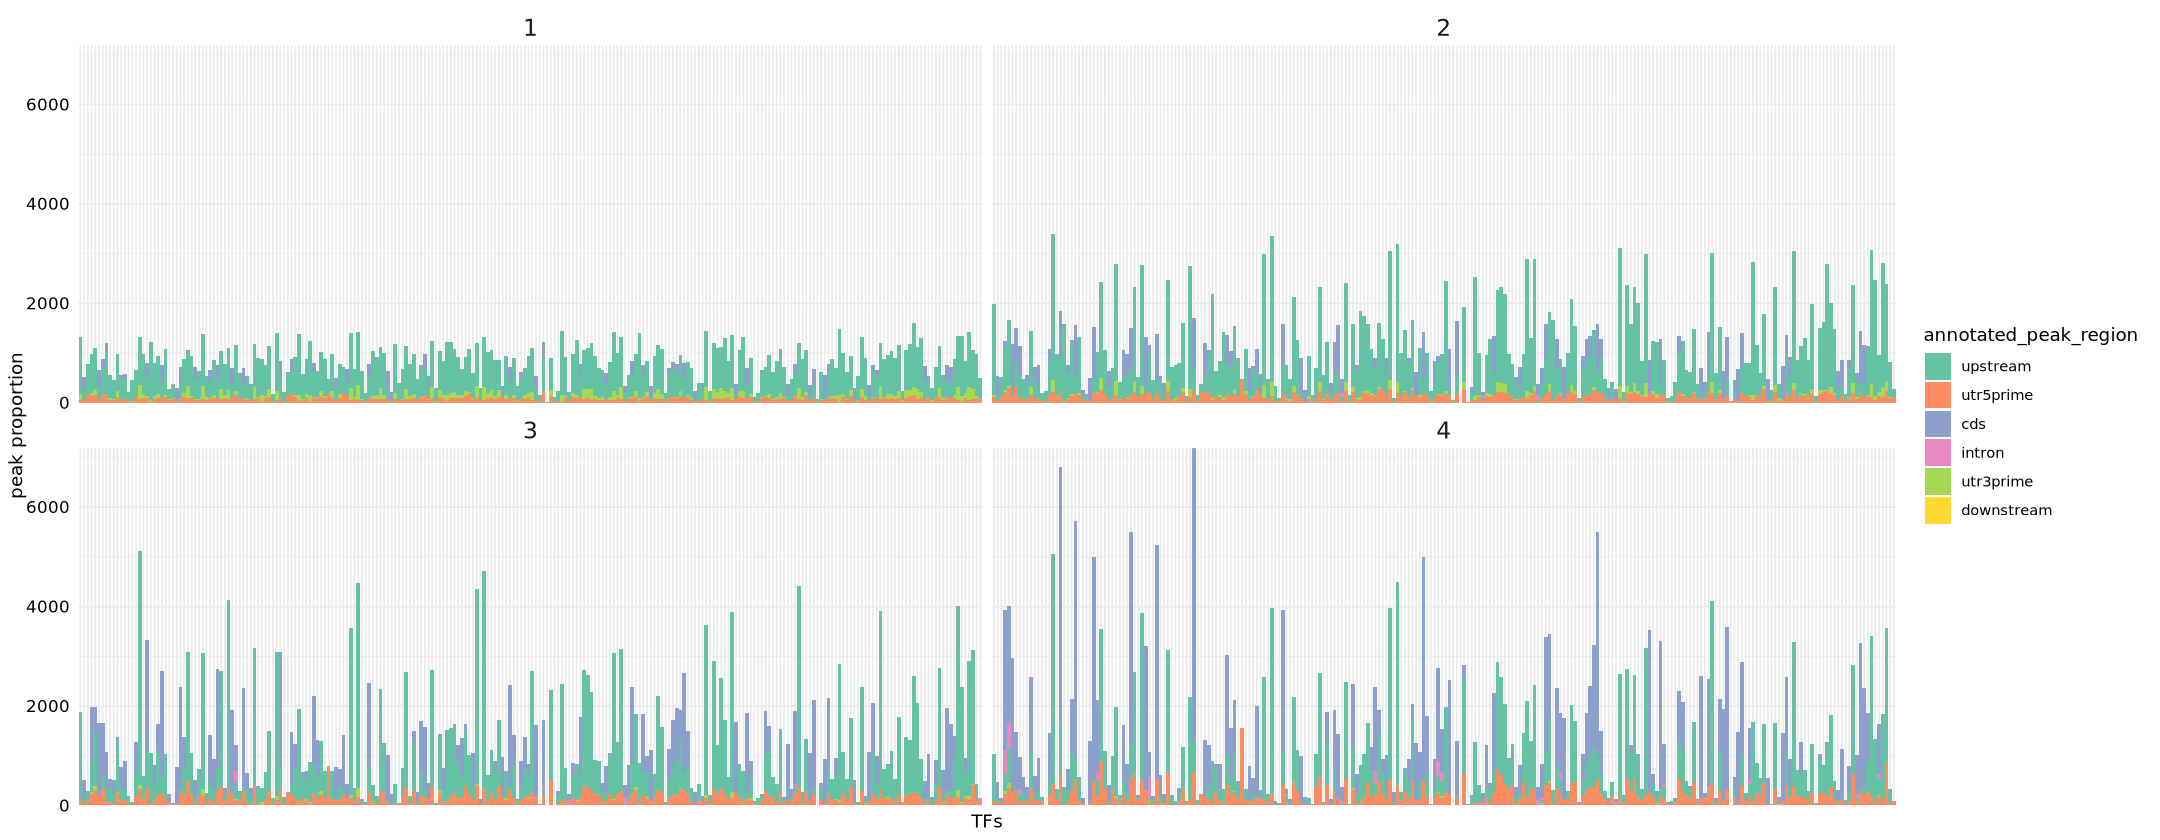

In [61]:
options(repr.plot.width=18,repr.plot.height=7,resolution=300)
subinfo_of_fulltable_2 %>%
    group_by(tf,n_cons_species_minfrac0,annotated_peak_region) %>%
    summarise(peak_count=n()) %>%
    ungroup()%>%
    mutate(annotated_peak_region=factor(annotated_peak_region,levels=c("upstream","utr5prime","cds","intron","utr3prime","downstream"))) %>%
    ggplot(aes(x=tf,y=peak_count,fill=annotated_peak_region))+
    geom_col(position = "identity",width = 1)+
    facet_wrap(n_cons_species_minfrac0~.)+
    scale_y_continuous(expand = c(0,0))+
    theme_minimal()+
    scale_fill_brewer(palette = "Set2")+
    theme(axis.text.x = element_blank(),strip.text = element_text(size=14),axis.text=element_text(size=10,color="black"))+
    labs(x="TFs",y="peak proportion")

`summarise()` has grouped output by 'tf', 'n_cons_species_minfrac0'. You can
override using the `.groups` argument.


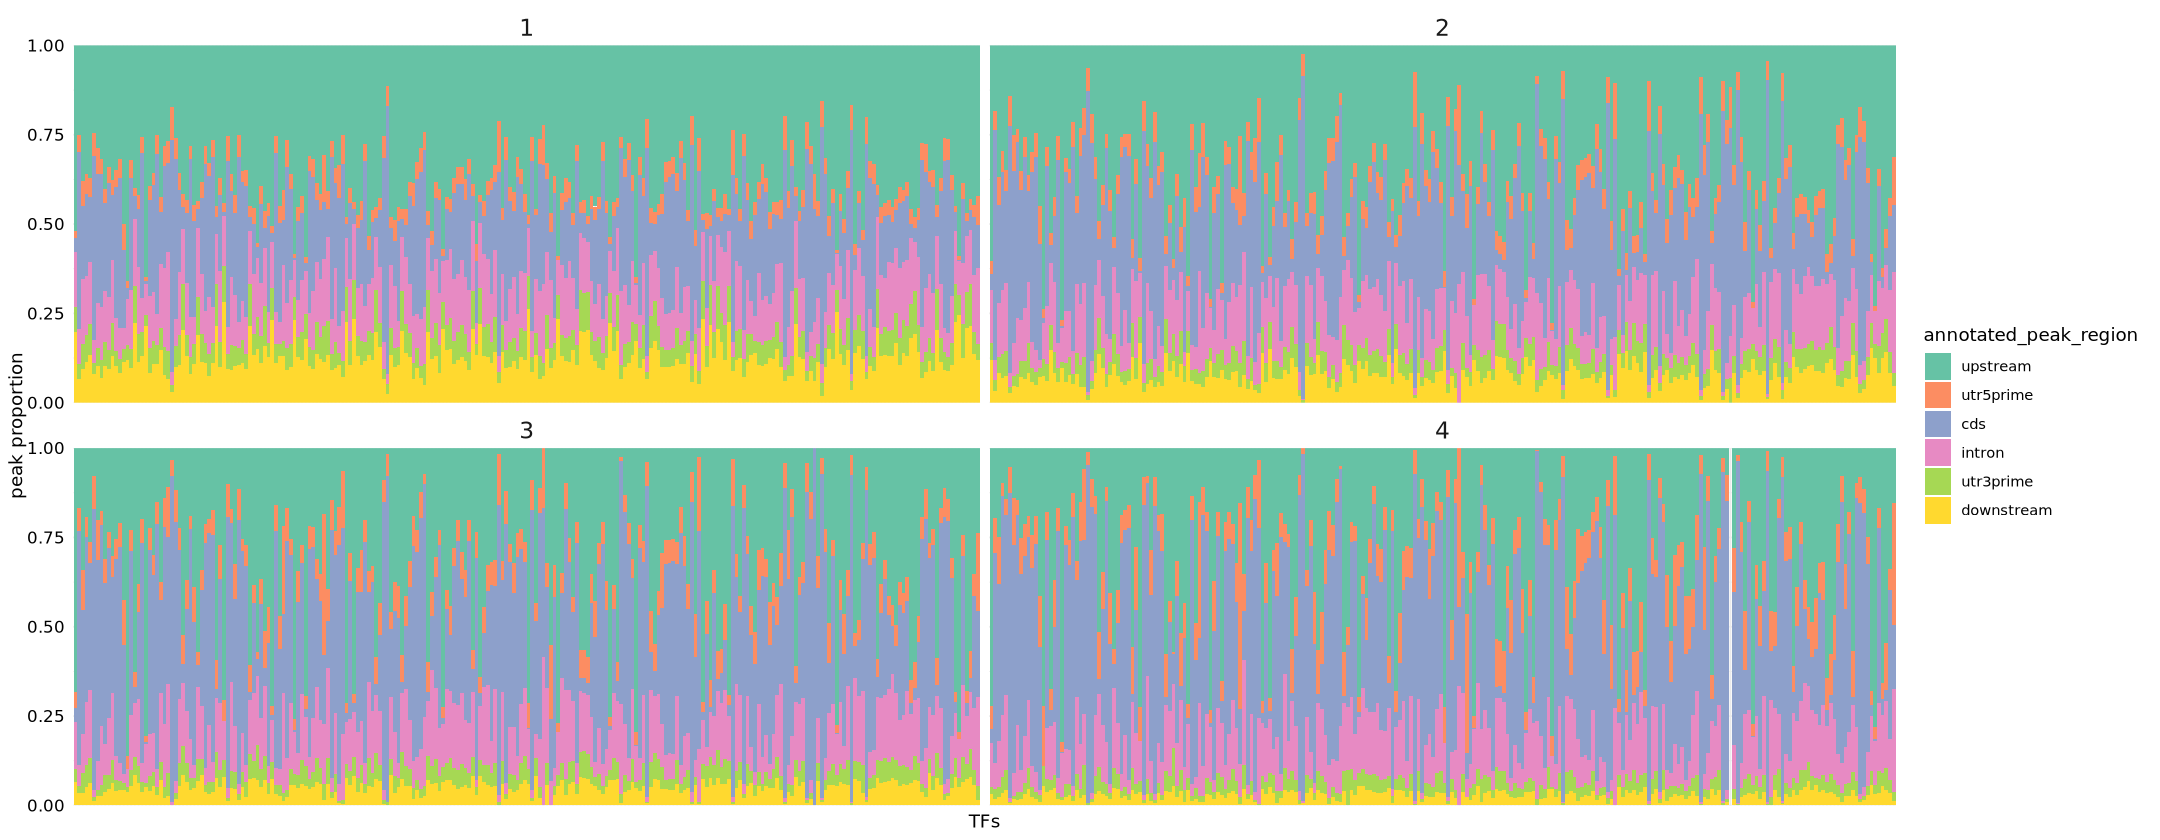

In [73]:
## statistics on the distribution of peaks for each TF
options(repr.plot.width=18,repr.plot.height=7,resolution=300)
subinfo_of_fulltable_2 %>%
    group_by(tf,n_cons_species_minfrac0,annotated_peak_region) %>%
    summarise(peak_count=n()) %>%
    ungroup()%>%
    mutate(annotated_peak_region=factor(annotated_peak_region,levels=c("upstream","utr5prime","cds","intron","utr3prime","downstream"))) %>%
    ggplot(aes(x=tf,y=peak_count,fill=annotated_peak_region))+
    geom_col(position = "fill",width = 1)+
    facet_wrap(n_cons_species_minfrac0~.)+
    scale_y_continuous(expand = c(0,0))+
    theme_minimal()+
    scale_fill_brewer(palette = "Set2")+
    theme(axis.text.x = element_blank(),strip.text = element_text(size=14),axis.text=element_text(size=10,color="black"))+
    labs(x="TFs",y="peak proportion")

`summarise()` has grouped output by 'tf', 'n_cons_species_minfrac0'. You can
override using the `.groups` argument.
Warning message:
“Removed 9 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 9 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 0.985”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 2.015”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  1.49e-16”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 1”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 0.985”
Warning message in 

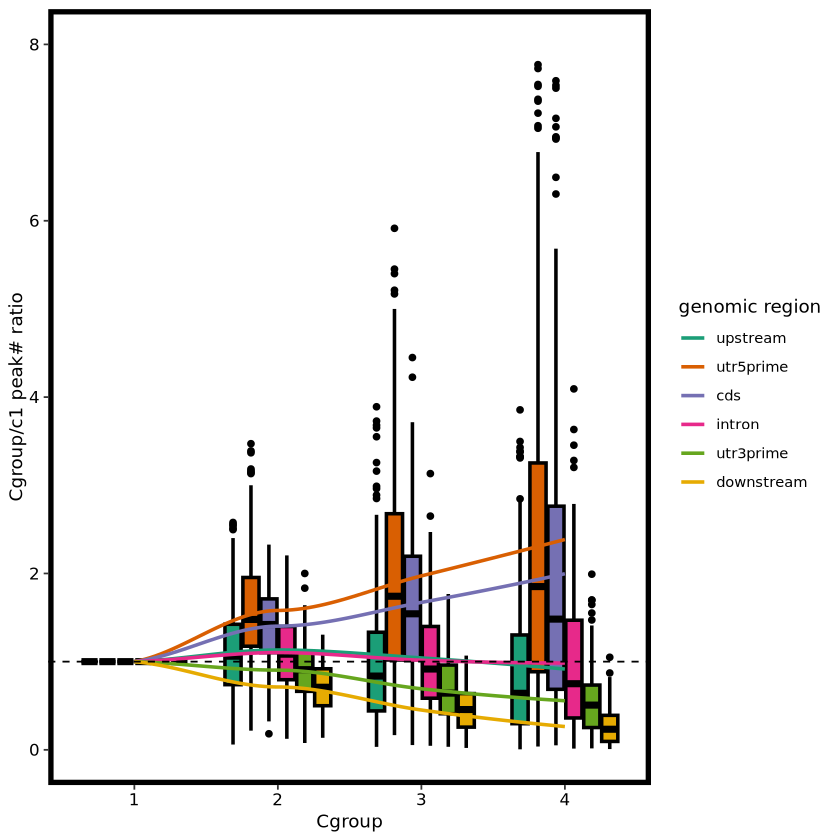

In [60]:
subinfo_of_fulltable_2 %>%
    group_by(tf,n_cons_species_minfrac0,annotated_peak_region) %>%
    summarise(peak_count=n()) %>%
    ungroup()%>%
    group_by(tf,annotated_peak_region) %>%
    mutate(c1_ratio=peak_count/peak_count[n_cons_species_minfrac0==1]) %>%
    mutate(annotated_peak_region=factor(annotated_peak_region,levels=c("upstream","utr5prime","cds","intron","utr3prime","downstream"))) %>%
    ggplot(aes(x=as.factor(n_cons_species_minfrac0),y=c1_ratio,fill=annotated_peak_region))+
    geom_boxplot(color="black",size=1)+
    geom_smooth(method = "loess", se=FALSE, aes(group=annotated_peak_region,color=annotated_peak_region))+
    geom_hline(yintercept = 1,linetype="dashed")+
    scale_color_brewer(palette = "Dark2")+
    scale_fill_brewer(palette = "Dark2")+
    theme(panel.background = element_blank(), 
        axis.text=element_text(size=10,color="black"),
        panel.grid.major = element_blank(),panel.border = element_rect(color="Black",fill=NA,size=3))+
    ylim(0,8)+
    labs(x="Cgroup",y="Cgroup/c1 peak# ratio",fill="genomic regions")+
    guides(color=guide_legend("genomic region"), fill = "none")

`summarise()` has grouped output by 'tf', 'n_cons_species_minfrac0'. You can
override using the `.groups` argument.


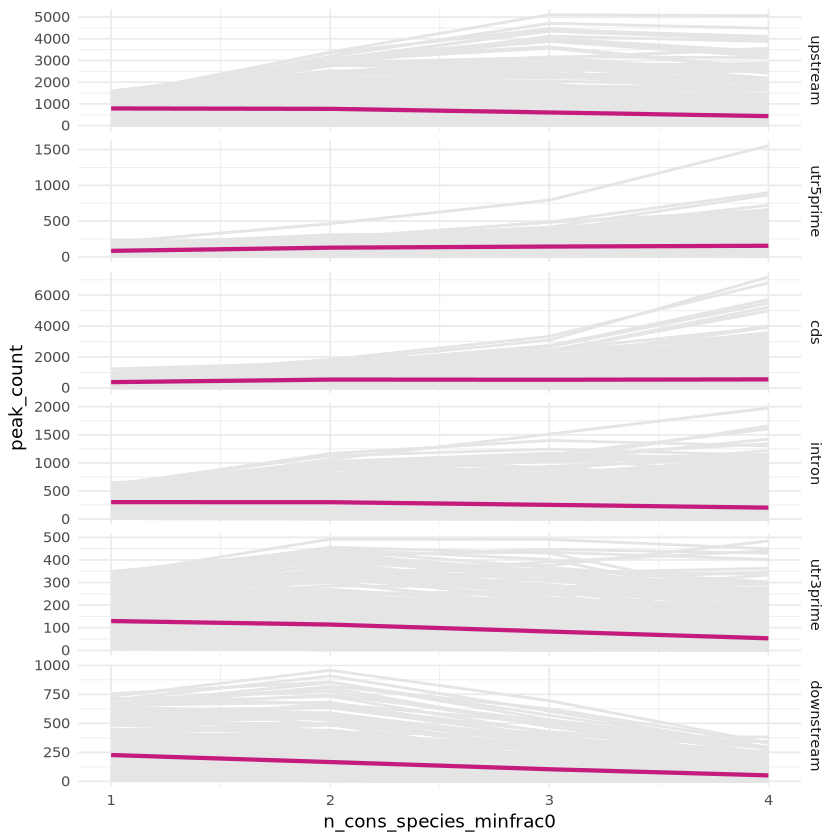

In [42]:
subinfo_of_fulltable_2 %>%
    group_by(tf,n_cons_species_minfrac0,annotated_peak_region) %>%
    summarise(peak_count=n()) %>%
    group_by(tf,n_cons_species_minfrac0,annotated_peak_region) %>%
    ungroup()%>%
    mutate(annotated_peak_region=factor(annotated_peak_region,levels=c("upstream","utr5prime","cds","intron","utr3prime","downstream"))) %>%
    ggplot(aes(x=n_cons_species_minfrac0,y=peak_count,group=tf))+
    geom_line(color="gray90",size=0.8)+
    stat_summary(aes(group=1),fun.y=median, geom="line", size=1.2, color="#c51b7d") +
    facet_grid(annotated_peak_region~.,scales = "free")+
    theme_minimal()+
    theme(legend.position = "None")


In [8]:
subinfo_of_fulltable_2 %>%
head(n=3)

,peak_chr,peak_start,peak_end,peak_name,peak_foldch,summit_to_cds_start,summit_to_cds_end,target_id,gene,tf,n_cons_species_minfrac0,annotated_peak_region,file,partition_pcg,peak_location
,<chr>,<int>,<int>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<chr>
1,Chr3,15645684,15646225,AT1G01060_A_thaliana_Col-0_DAPi709D10-ORGi5005-96P169_peak_8939,121.602,-508,-1614,AT3G43750.1,AT3G43750,AT1G01060,3,upstream,promoter,0.7460,upstream
2,Chr1,1637949,1638542,AT1G01060_A_thaliana_Col-0_DAPi709D10-ORGi5005-96P169_peak_146,115.549,-1171,-2530,AT1G05540.1,AT1G05540,AT1G01060,2,upstream,promoter,0.4145,upstream
3,Chr1,1637949,1638542,AT1G01060_A_thaliana_Col-0_DAPi709D10-ORGi5005-96P169_peak_146,115.549,-314,-1681,AT1G05530.1,AT1G05530,AT1G01060,2,upstream,promoter,0.8430,upstream


In [22]:
subinfo_of_fulltable_2 %>%
    mutate(plot_bin = cut(partition_pcg, breaks = seq(0,1,by=0.01),labels = seq(0,0.99,by=0.01))) %>%
    filter(tf=="AT1G01060") %>%
    head()

,peak_chr,peak_start,peak_end,peak_name,peak_foldch,summit_to_cds_start,summit_to_cds_end,target_id,gene,tf,n_cons_species_minfrac0,annotated_peak_region,file,partition_pcg,peak_location,plot_bin
,<chr>,<int>,<int>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<chr>,<fct>
1,Chr3,15645684,15646225,AT1G01060_A_thaliana_Col-0_DAPi709D10-ORGi5005-96P169_peak_8939,121.602,-508,-1614,AT3G43750.1,AT3G43750,AT1G01060,3,upstream,promoter,0.7460,upstream,0.74
2,Chr1,1637949,1638542,AT1G01060_A_thaliana_Col-0_DAPi709D10-ORGi5005-96P169_peak_146,115.549,-1171,-2530,AT1G05540.1,AT1G05540,AT1G01060,2,upstream,promoter,0.4145,upstream,0.41
3,Chr1,1637949,1638542,AT1G01060_A_thaliana_Col-0_DAPi709D10-ORGi5005-96P169_peak_146,115.549,-314,-1681,AT1G05530.1,AT1G05530,AT1G01060,2,upstream,promoter,0.8430,upstream,0.84
4,Chr1,18204823,18205351,AT1G01060_A_thaliana_Col-0_DAPi709D10-ORGi5005-96P169_peak_2361,115.549,-855,-1610,AT1G49220.1,AT1G49220,AT1G01060,4,upstream,promoter,0.5725,upstream,0.57
5,Chr1,17178696,17179222,AT1G01060_A_thaliana_Col-0_DAPi709D10-ORGi5005-96P169_peak_2199,110.414,-389,-1475,AT1G45474.2,AT1G45474,AT1G01060,3,upstream,promoter,0.8055,upstream,0.8
6,Chr3,15867652,15868110,AT1G01060_A_thaliana_Col-0_DAPi709D10-ORGi5005-96P169_peak_8983,106.929,-615,-1726,AT3G44100.1,AT3G44100,AT1G01060,1,upstream,promoter,0.6925,upstream,0.69


In [11]:
length(seq(0,0.98,by=0.02))

[1] 50

In [19]:
length(seq(0,1,length.out = 50))

[1] 50

In [18]:
subinfo_of_fulltable_2 %>%
    mutate(plot_bin = cut(partition_pcg, breaks = seq(0,1,length.out = 51),labels = seq(0,0.98,length.out=50))) %>%
    head()

,peak_chr,peak_start,peak_end,peak_name,peak_foldch,summit_to_cds_start,summit_to_cds_end,target_id,gene,tf,n_cons_species_minfrac0,annotated_peak_region,file,partition_pcg,peak_location,plot_bin
,<chr>,<int>,<int>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<chr>,<fct>
1,Chr3,15645684,15646225,AT1G01060_A_thaliana_Col-0_DAPi709D10-ORGi5005-96P169_peak_8939,121.602,-508,-1614,AT3G43750.1,AT3G43750,AT1G01060,3,upstream,promoter,0.7460,upstream,0.74
2,Chr1,1637949,1638542,AT1G01060_A_thaliana_Col-0_DAPi709D10-ORGi5005-96P169_peak_146,115.549,-1171,-2530,AT1G05540.1,AT1G05540,AT1G01060,2,upstream,promoter,0.4145,upstream,0.4
3,Chr1,1637949,1638542,AT1G01060_A_thaliana_Col-0_DAPi709D10-ORGi5005-96P169_peak_146,115.549,-314,-1681,AT1G05530.1,AT1G05530,AT1G01060,2,upstream,promoter,0.8430,upstream,0.84
4,Chr1,18204823,18205351,AT1G01060_A_thaliana_Col-0_DAPi709D10-ORGi5005-96P169_peak_2361,115.549,-855,-1610,AT1G49220.1,AT1G49220,AT1G01060,4,upstream,promoter,0.5725,upstream,0.56
5,Chr1,17178696,17179222,AT1G01060_A_thaliana_Col-0_DAPi709D10-ORGi5005-96P169_peak_2199,110.414,-389,-1475,AT1G45474.2,AT1G45474,AT1G01060,3,upstream,promoter,0.8055,upstream,0.8
6,Chr3,15867652,15868110,AT1G01060_A_thaliana_Col-0_DAPi709D10-ORGi5005-96P169_peak_8983,106.929,-615,-1726,AT3G44100.1,AT3G44100,AT1G01060,1,upstream,promoter,0.6925,upstream,0.68


In [13]:
head(subinfo_of_fulltable_2,n=3)

,peak_chr,peak_start,peak_end,peak_name,peak_foldch,summit_to_cds_start,summit_to_cds_end,target_id,gene,tf,n_cons_species_minfrac0,annotated_peak_region,file,partition_pcg,peak_location
,<chr>,<int>,<int>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<chr>
1,Chr3,15645684,15646225,AT1G01060_A_thaliana_Col-0_DAPi709D10-ORGi5005-96P169_peak_8939,121.602,-508,-1614,AT3G43750.1,AT3G43750,AT1G01060,3,upstream,promoter,0.7460,upstream
2,Chr1,1637949,1638542,AT1G01060_A_thaliana_Col-0_DAPi709D10-ORGi5005-96P169_peak_146,115.549,-1171,-2530,AT1G05540.1,AT1G05540,AT1G01060,2,upstream,promoter,0.4145,upstream
3,Chr1,1637949,1638542,AT1G01060_A_thaliana_Col-0_DAPi709D10-ORGi5005-96P169_peak_146,115.549,-314,-1681,AT1G05530.1,AT1G05530,AT1G01060,2,upstream,promoter,0.8430,upstream


In [9]:
seq(0,0.98,length.out = 50)

[1] 0.00 0.02 0.04 0.06 0.08 0.10 0.12 0.14 0.16 0.18 0.20 0.22 0.24 0.26 0.28
[16] 0.30 0.32 0.34 0.36 0.38 0.40 0.42 0.44 0.46 0.48 0.50 0.52 0.54 0.56 0.58
[31] 0.60 0.62 0.64 0.66 0.68 0.70 0.72 0.74 0.76 0.78 0.80 0.82 0.84 0.86 0.88
[46] 0.90 0.92 0.94 0.96 0.98

In [17]:
subinfo_of_fulltable_2 %>%
    # split upstream, genebody and downstream all into 100 bins
    #mutate(plot_bin = cut(partition_pcg, breaks = seq(0,1,length.out = 51),labels = seq(0,0.98,by=0.02),include.lowest = TRUE)) %>%
    mutate(
        plot_bin = case_when(
            peak_location == "downstream" ~ cut(
                partition_pcg,
                breaks = seq(0, 1, length.out = 16),
                labels = seq(0, 1, length.out = 15),
                include.lowest = TRUE
            ),
            TRUE ~ cut(
                partition_pcg,
                breaks = seq(0, 1, length.out = 51),
                labels = seq(0, 0.98, length.out = 50),
                include.lowest = TRUE
            )
        )
    )%>%
    filter(tf=="AT1G01060") %>%
    group_by(peak_location,plot_bin,n_cons_species_minfrac0) %>%
    summarise(count=n()) %>%
    ungroup()%>%
    group_by(n_cons_species_minfrac0) %>%
    mutate(percent=count/sum(count)) %>%
    ungroup()%>%
    mutate(plot_bin=as.numeric(as.character(plot_bin))) %>%
    mutate(plot_bin_2=ifelse(peak_location=="upstream",plot_bin-1,
            ifelse(peak_location=="downstream",plot_bin+1,plot_bin))) %>%
    head()

`summarise()` has grouped output by 'peak_location', 'plot_bin'. You can
override using the `.groups` argument.


peak_location,plot_bin,n_cons_species_minfrac0,count,percent,plot_bin_2
<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>
downstream,0.00000000,1,20,0.0078308536,1.000000
downstream,0.00000000,2,14,0.0042761148,1.000000
downstream,0.00000000,3,4,0.0014587892,1.000000
downstream,0.00000000,4,1,0.0007017544,1.000000
downstream,0.07142857,1,33,0.0129209084,1.071429
downstream,0.07142857,2,20,0.0061087355,1.071429


In [35]:
seq(0, 1, length.out = 16)

[1] 0.00000000 0.06666667 0.13333333 0.20000000 0.26666667 0.33333333
 [7] 0.40000000 0.46666667 0.53333333 0.60000000 0.66666667 0.73333333
[13] 0.80000000 0.86666667 0.93333333 1.00000000

In [34]:
 seq(0, 15/100, length.out = 15)

[1] 0.00000000 0.01071429 0.02142857 0.03214286 0.04285714 0.05357143
 [7] 0.06428571 0.07500000 0.08571429 0.09642857 0.10714286 0.11785714
[13] 0.12857143 0.13928571 0.15000000

In [49]:
as.numeric(factor(c("A","B","C")))

[1] 1 2 3

`summarise()` has grouped output by 'peak_location', 'plot_bin'. You can
override using the `.groups` argument.


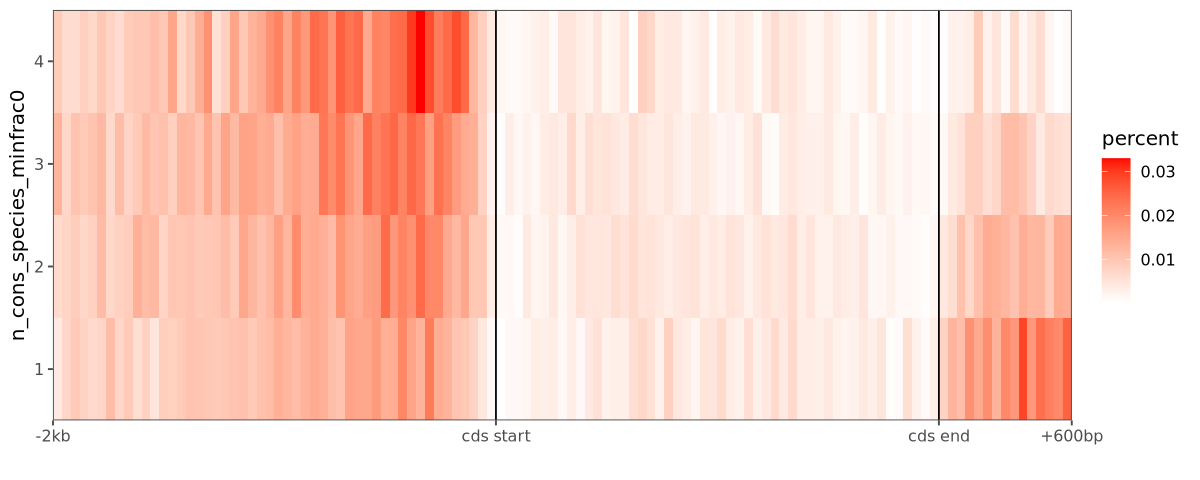

In [53]:
options(repr.plot.width=10,repr.plot.height=4,resolution=300)
subinfo_of_fulltable_2 %>%
    # split upstream, genebody and downstream all into 100 bins
    #mutate(plot_bin = cut(partition_pcg, breaks = seq(0,1,length.out = 51),labels = seq(0,0.98,by=0.02),include.lowest = TRUE)) %>%
    mutate(
        plot_bin = case_when(
      peak_location == "upstream" ~ cut(partition_pcg, breaks = seq(0, 1, length.out = 51), labels = paste0("up_",1:50), include.lowest = TRUE),
      peak_location == "genebody" ~ cut(partition_pcg, breaks = seq(0, 1, length.out = 51), labels = paste0("gb_",1:50), include.lowest = TRUE),
      peak_location == "downstream" ~ cut(partition_pcg, breaks = seq(0, 1, length.out = 16), labels = paste0("down_",1:15), include.lowest = TRUE)
    ))%>%
    filter(tf=="AT1G01060") %>%
    group_by(peak_location,plot_bin,n_cons_species_minfrac0) %>%
    summarise(count=n()) %>%
    ungroup()%>%
    group_by(n_cons_species_minfrac0) %>%
    mutate(percent=count/sum(count)) %>%
    ungroup()%>%
    mutate(plot_bin=factor(plot_bin,levels = c(paste0("up_",1:50),paste0("gb_",1:50),paste0("down_",1:15))))%>%
    # mutate(plot_bin=as.numeric(as.character(plot_bin))) %>%
    # mutate(plot_bin_2=ifelse(peak_location=="upstream",plot_bin-0.5,
    #         ifelse(peak_location=="downstream",plot_bin+0.5,plot_bin))) %>%
    mutate(plot_bin_x=as.numeric(plot_bin)) %>%
    ggplot(aes(x=plot_bin_x,y=n_cons_species_minfrac0,fill=percent))+
    geom_tile()+
    geom_vline(xintercept = c(50.5,100.5))+
    scale_fill_gradient(low = "white", high = "red")+
    theme_few()+
    scale_x_continuous(breaks = c(0.5,50.5,100.5,115.5),labels=c("-2kb","cds start","cds end","+600bp"),expand = c(0,0.01))+
    #scale_x_discrete(breaks = c("up_1","up_50","gb_50","down_50"),labels=c("-2kb","cds start","cds end","+600bp"),expand = c(0,0.01))+
    scale_y_continuous(expand = c(0,0))
    


In [12]:
## get the gene names that have genebody longer than 500
gene_lt500<- 
subinfo_of_fulltable %>%
    mutate(gb_length=ifelse(summit_to_cds_start>0 & summit_to_cds_end>0, summit_to_cds_start-summit_to_cds_end,
    ifelse(summit_to_cds_start<0 & summit_to_cds_end<0,abs(summit_to_cds_end-summit_to_cds_start),
    summit_to_cds_start-summit_to_cds_end))) %>%
    select(gene,gb_length) %>%
    unique() %>%
    filter(gb_length>500) %>%
    pull(gene)

In [14]:
do.call(rbind,lapply(unique(subinfo_of_fulltable_2$tf),function(TF){
    TF_name <- labels %>% filter(gene_id==TF) %>%  pull(tf_name)
    TF_family <- labels %>% filter(gene_id==TF) %>% pull(tf_family)
    
    subinfo_of_fulltable_2 %>%
    filter(tf==TF,n_cons_species_minfrac0==1,gene %in% !!gene_lt500) %>%
    # split upstream, genebody and downstream all into 100 bins
    #mutate(plot_bin = cut(partition_pcg, breaks = seq(0,1,length.out = 51),labels = seq(0,0.98,by=0.02),include.lowest = TRUE)) %>%
    mutate(
        plot_bin = case_when(
      peak_location == "upstream" ~ cut(partition_pcg, breaks = seq(0, 1, length.out = 51), labels = paste0("up_",1:50), include.lowest = TRUE),
      peak_location == "genebody" ~ cut(partition_pcg, breaks = seq(0, 1, length.out = 51), labels = paste0("gb_",1:50), include.lowest = TRUE),
      peak_location == "downstream" ~ cut(partition_pcg, breaks = seq(0, 1, length.out = 16), labels = paste0("down_",1:15), include.lowest = TRUE)
    ))%>%
    group_by(peak_location,plot_bin) %>%
    summarise(count=n()) %>%
    ungroup()%>%
    mutate(percent=count/sum(count)) %>%
    mutate(plot_bin=factor(plot_bin,levels = c(paste0("up_",1:50),paste0("gb_",1:50),paste0("down_",1:15))))%>%
    mutate(plot_bin_2=as.numeric(plot_bin)) -> tmp_data

    tmp_data$tf_id <- TF
    tmp_data$tf_name <- TF_name
    tmp_data$tf_family <- TF_family
    return(tmp_data)

})) -> full_c1_df

`summarise()` has grouped output by 'peak_location'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'peak_location'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'peak_location'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'peak_location'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'peak_location'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'peak_location'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'peak_location'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'peak_location'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'peak_location'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'peak_location'. You can override using the
`.groups` argument.


In [22]:
do.call(rbind,lapply(unique(subinfo_of_fulltable_2$tf),function(TF){
    TF_name <- labels %>% filter(gene_id==TF) %>%  pull(tf_name)
    TF_family <- labels %>% filter(gene_id==TF) %>% pull(tf_family)

    subinfo_of_fulltable_2 %>%
        filter(tf==TF,n_cons_species_minfrac0==4,gene %in% !!gene_lt500) %>%
        mutate(plot_bin = cut(partition_pcg, breaks = seq(0,1,by=0.01),labels = seq(0,0.99,by=0.01))) %>% ## split into 100 bins
        
        group_by(peak_location,plot_bin) %>%
        summarise(count=n()) %>%
        ungroup()%>%
        mutate(percent=count/sum(count)) %>% ## calculate the percentage of peaks in each bin in each Cscore group
        mutate(plot_bin=as.numeric(as.character(plot_bin))) %>%
        mutate(plot_bin_2=ifelse(peak_location=="upstream",plot_bin-1,
                ifelse(peak_location=="downstream",plot_bin+1,plot_bin))) -> tmp_data

    subinfo_of_fulltable_2 %>%
    # split upstream, genebody and downstream all into 100 bins
    #mutate(plot_bin = cut(partition_pcg, breaks = seq(0,1,length.out = 51),labels = seq(0,0.98,by=0.02),include.lowest = TRUE)) %>%
    mutate(
        plot_bin = case_when(
      peak_location == "upstream" ~ cut(partition_pcg, breaks = seq(0, 1, length.out = 51), labels = paste0("up_",1:50), include.lowest = TRUE),
      peak_location == "genebody" ~ cut(partition_pcg, breaks = seq(0, 1, length.out = 51), labels = paste0("gb_",1:50), include.lowest = TRUE),
      peak_location == "downstream" ~ cut(partition_pcg, breaks = seq(0, 1, length.out = 16), labels = paste0("down_",1:15), include.lowest = TRUE)
    ))%>%
    filter(tf==TF,n_cons_species_minfrac0==4) %>%
    group_by(peak_location,plot_bin) %>%
    summarise(count=n()) %>%
    ungroup()%>%
    mutate(percent=count/sum(count)) %>%
    mutate(plot_bin=factor(plot_bin,levels = c(paste0("up_",1:50),paste0("gb_",1:50),paste0("down_",1:15))))%>%
    mutate(plot_bin_2=as.numeric(plot_bin)) -> tmp_data

    tmp_data$tf_id <- TF
    tmp_data$tf_name <- TF_name
    tmp_data$tf_family <- TF_family
    return(tmp_data)

})) -> full_c4_df

`summarise()` has grouped output by 'peak_location'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'peak_location'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'peak_location'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'peak_location'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'peak_location'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'peak_location'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'peak_location'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'peak_location'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'peak_location'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'peak_location'. You can override using the
`.groups` argument.


In [59]:
head(full_c4_df)

peak_location,plot_bin,count,percent,plot_bin_2,tf_id,tf_name,tf_family
<chr>,<fct>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>
downstream,down_1,1,0.0007017544,101,AT1G01060,LHY,MYBRELATED
downstream,down_2,4,0.0028070175,102,AT1G01060,LHY,MYBRELATED
downstream,down_3,4,0.0028070175,103,AT1G01060,LHY,MYBRELATED
downstream,down_4,5,0.0035087719,104,AT1G01060,LHY,MYBRELATED
downstream,down_5,13,0.0091228070,105,AT1G01060,LHY,MYBRELATED
downstream,down_6,4,0.0028070175,106,AT1G01060,LHY,MYBRELATED


In [27]:
library(viridis)

Loading required package: viridisLite



In [25]:
full_c4_df %>%
group_by(tf_id) %>%
mutate(tf_peak_sum=sum(count)) %>%
head()

peak_location,plot_bin,count,percent,plot_bin_2,tf_id,tf_name,tf_family,tf_peak_sum
<chr>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>
downstream,0.02,1,0.0007017544,1.02,AT1G01060,LHY,MYBRELATED,1425
downstream,0.09,1,0.0007017544,1.09,AT1G01060,LHY,MYBRELATED,1425
downstream,0.10,2,0.0014035088,1.10,AT1G01060,LHY,MYBRELATED,1425
downstream,0.12,1,0.0007017544,1.12,AT1G01060,LHY,MYBRELATED,1425
downstream,0.14,3,0.0021052632,1.14,AT1G01060,LHY,MYBRELATED,1425
downstream,0.17,1,0.0007017544,1.17,AT1G01060,LHY,MYBRELATED,1425


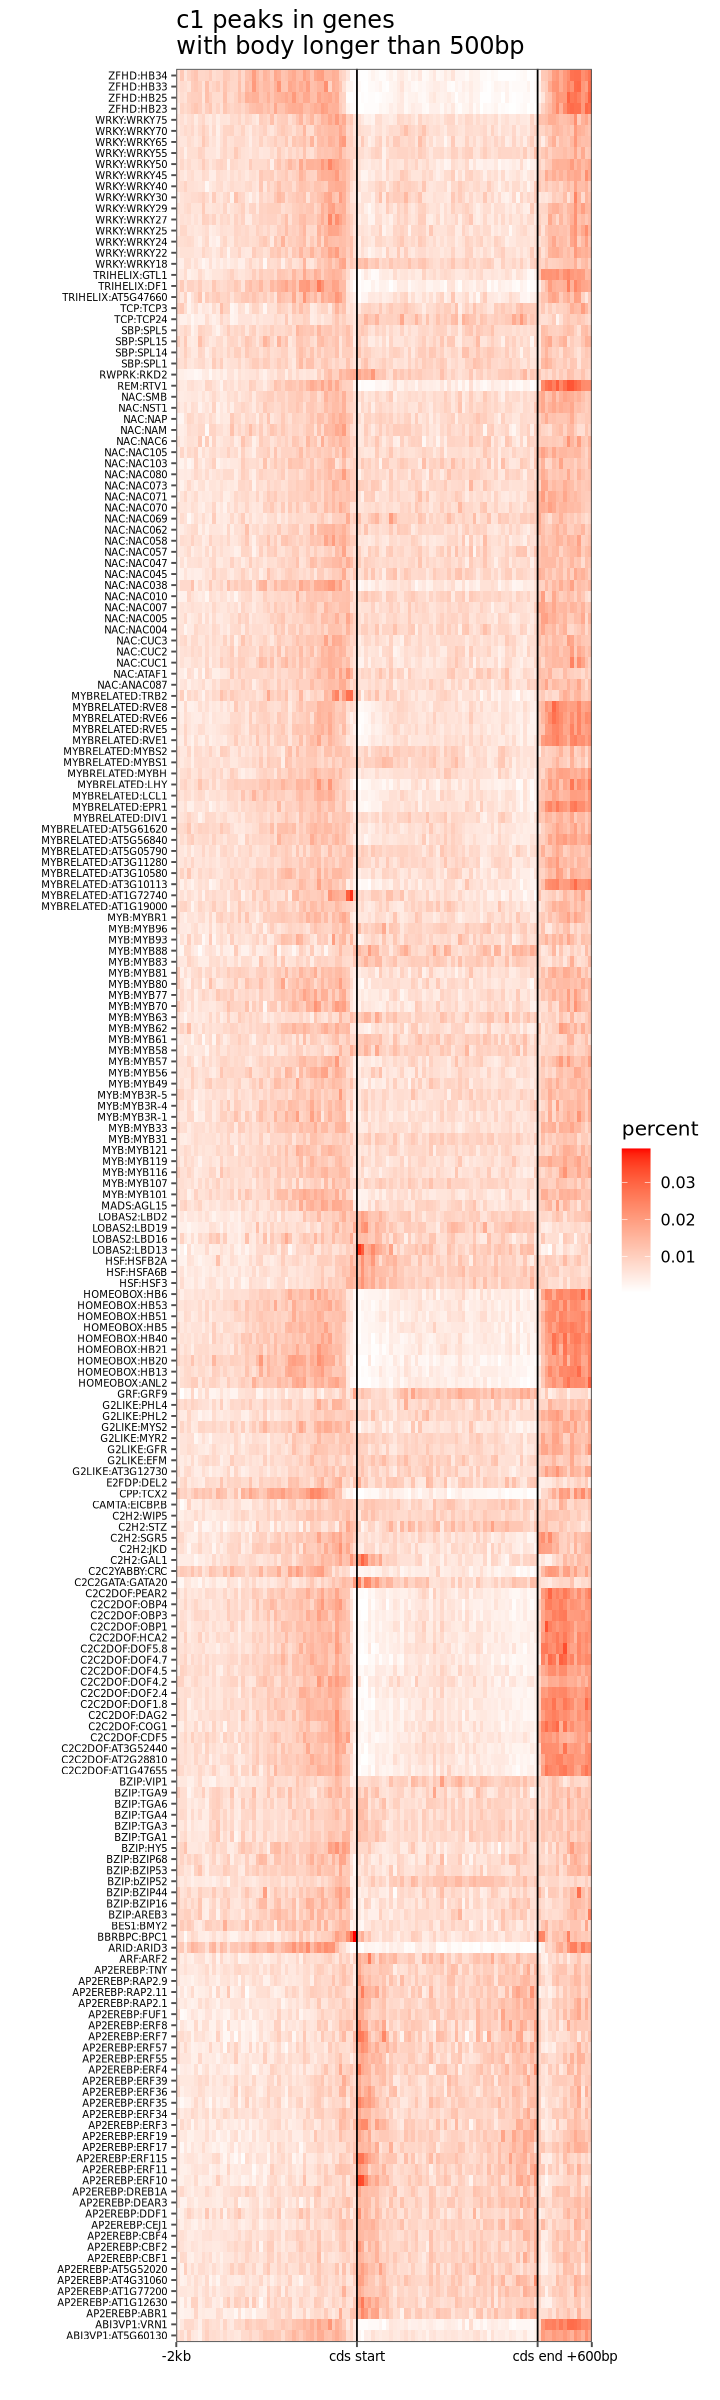

In [20]:
options(repr.plot.width=6,repr.plot.height=20,resolution=300)
p <- full_c1_df %>%
group_by(tf_id) %>%
mutate(tf_peak_sum=sum(count)) %>%
filter(tf_peak_sum>1000)%>%
mutate(plot_name=paste(tf_family,tf_name,sep = ":"))%>%
ggplot(aes(x=plot_bin_2,y=plot_name,fill=percent))+
geom_tile()+
geom_vline(xintercept = c(50.5,100.5))+
scale_fill_gradient(low = "white", high = "red")+
theme_few()+
labs(x="",y="",title="c1 peaks in genes \nwith body longer than 500bp")+
scale_x_continuous(breaks = c(0.5,50.5,100.5,115.5),labels=c("-2kb","cds start","cds end","+600bp"),expand = c(0,0.01))+
theme(axis.text.x=element_text(size=8,color = "black"),
        axis.text.y=element_text(size=6,color="black"))
p

In [21]:
ggsave(p,filename = "01_all_tf_c1_gt1000_peak_gene_distribution.pdf",height = 20,width = 6)

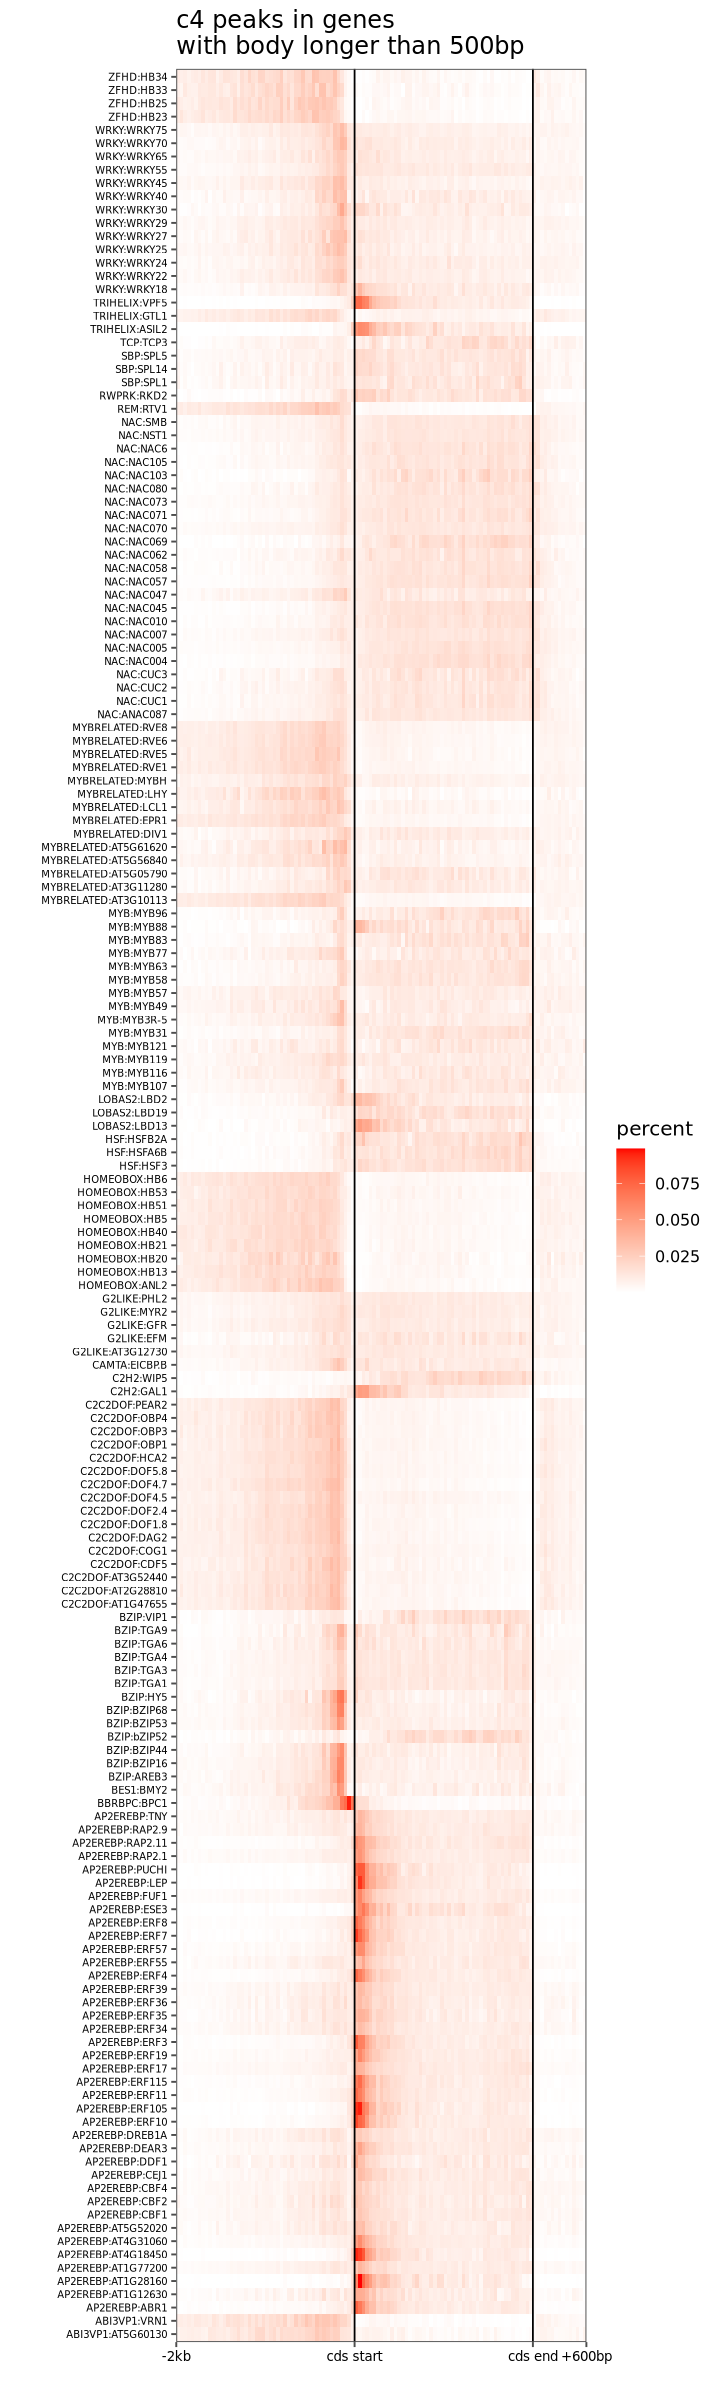

In [27]:
options(repr.plot.width=6,repr.plot.height=20,resolution=300)
p <- full_c4_df %>%
group_by(tf_id) %>%
mutate(tf_peak_sum=sum(count)) %>%
filter(tf_peak_sum>1000)%>%
mutate(plot_name=paste(tf_family,tf_name,sep = ":"))%>%
ggplot(aes(x=plot_bin_2,y=plot_name,fill=percent))+
geom_tile()+
geom_vline(xintercept = c(50.5,100.5))+
scale_fill_gradient(low = "white", high = "red")+
theme_few()+
labs(x="",y="",title="c4 peaks in genes \nwith body longer than 500bp")+
scale_x_continuous(breaks = c(0.5,50.5,100.5,115.5),labels=c("-2kb","cds start","cds end","+600bp"),expand = c(0,0.01))+
theme(axis.text.x=element_text(size=8,color = "black"),
        axis.text.y=element_text(size=6,color="black"))
p

In [64]:
saveRDS(full_c4_df,file = "/clusterfs/jgi/groups/gentech/homes/romalley/full_DAPseq_annotation/analysis/all_tf_c4peak_full_gene_50+50+15bin_distribution.rds")

In [28]:
setwd("/clusterfs/jgi/groups/gentech/homes/romalley/full_DAPseq_annotation/analysis/tf_full_gene_100bin_each_region_distribution_heatmap")

In [29]:
ggsave(p,filename = "01_all_tf_c4_gt1000_peak_gene_distribution.pdf",height = 20,width = 6)

In [63]:
head(full_c4_df)

peak_location,plot_bin,count,percent,plot_bin_2,tf_id,tf_name,tf_family
<chr>,<fct>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>
downstream,down_1,1,0.0007017544,101,AT1G01060,LHY,MYBRELATED
downstream,down_2,4,0.0028070175,102,AT1G01060,LHY,MYBRELATED
downstream,down_3,4,0.0028070175,103,AT1G01060,LHY,MYBRELATED
downstream,down_4,5,0.0035087719,104,AT1G01060,LHY,MYBRELATED
downstream,down_5,13,0.0091228070,105,AT1G01060,LHY,MYBRELATED
downstream,down_6,4,0.0028070175,106,AT1G01060,LHY,MYBRELATED


In [13]:

setwd("/clusterfs/jgi/groups/gentech/homes/romalley/full_DAPseq_annotation/analysis/tf_full_gene_100bin_each_region_distribution_heatmap")
for( TF in unique(subinfo_of_fulltable_2$tf)){
    TF_name <- labels %>% filter(gene_id==TF) %>%  pull(tf_name)
    TF_family <- labels %>% filter(gene_id==TF) %>% pull(tf_family)

    if(sum(subinfo_of_fulltable_2$tf==TF)>2000){
      (subinfo_of_fulltable_2 %>%
        # split upstream, genebody and downstream all into 100 bins
        #mutate(plot_bin = cut(partition_pcg, breaks = seq(0,1,length.out = 51),labels = seq(0,0.98,by=0.02),include.lowest = TRUE)) %>%
        filter(tf==TF) %>%
        mutate(
            plot_bin = case_when(
          peak_location == "upstream" ~ cut(partition_pcg, breaks = seq(0, 1, length.out = 51), labels = paste0("up_",1:50), include.lowest = TRUE),
          peak_location == "genebody" ~ cut(partition_pcg, breaks = seq(0, 1, length.out = 51), labels = paste0("gb_",1:50), include.lowest = TRUE),
          peak_location == "downstream" ~ cut(partition_pcg, breaks = seq(0, 1, length.out = 16), labels = paste0("down_",1:15), include.lowest = TRUE)
        ))%>%
        group_by(peak_location,plot_bin,n_cons_species_minfrac0) %>%
        summarise(count=n()) %>%
        ungroup()%>%
        group_by(n_cons_species_minfrac0) %>%
        mutate(percent=count/sum(count)) %>%
        ungroup()%>%
        mutate(plot_bin=factor(plot_bin,levels = c(paste0("up_",1:50),paste0("gb_",1:50),paste0("down_",1:15))))%>%
        mutate(plot_bin_x=as.numeric(plot_bin)) %>%
        ggplot(aes(x=plot_bin_x,y=n_cons_species_minfrac0,fill=percent))+
        geom_tile()+
        geom_vline(xintercept = c(50.5,100.5))+
        scale_fill_gradient(low = "white", high = "red")+
        theme_few()+
        scale_x_continuous(breaks = c(0.5,50.5,100.5,115.5),labels=c("-2kb","cds start","cds end","+600bp"),expand = c(0,0.01))+
        scale_y_continuous(expand = c(0,0))+
        labs(x="",y="C-score",fill="proportion",title=paste0(TF,"(",TF_family,")"))+
        theme(axis.text=element_text(size=10,color = "black"),axis.title = element_text(size=12))
            
            ) %>%

            ggsave(filename = paste0(TF_family,"_",TF_name,"_","fullgene_100bin_each_region",".pdf"),width = 6,height = 2)
    }
    
}


`summarise()` has grouped output by 'peak_location', 'plot_bin'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'peak_location', 'plot_bin'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'peak_location', 'plot_bin'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'peak_location', 'plot_bin'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'peak_location', 'plot_bin'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'peak_location', 'plot_bin'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'peak_location', 'plot_bin'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'peak_location', 'plot_bin'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'peak_location', 'plot_bin'. You can
override using the `.groups` ar

In [76]:
## distribution of urt length for arabidopsis thaliana
!awk '$3==\"five_prime_UTR\"{print $5-$4}\' ../../reference/Arabidopsis_thaliana_Col-0.gff|sort

ERROR: Error in system(cmd, intern = TRUE): error in running command


: 

In [74]:
lengths_numeric <- as.numeric(lengths)
head(lengths_numeric)

numeric(0)

In [1]:
test <- !pwd

ERROR: Error in eval(expr, envir, enclos): object 'pwd' not found


In [10]:
full_anno_table %>%
    filter(tf=="AT1G01060") %>%
    select(gene,n_cons_species_minfrac0,file) %>%
    group_by(gene,file) %>%
    slice_max(n_cons_species_minfrac0,n=1) %>%
    ungroup()%>%
    unique()%>%
    head()

gene,n_cons_species_minfrac0,file
<chr>,<int>,<chr>
AT1G01020,3,genebody
AT1G01140,2,genebody
AT1G01190,4,promoter
AT1G01200,2,genebody
AT1G01360,2,genebody
AT1G01360,3,promoter


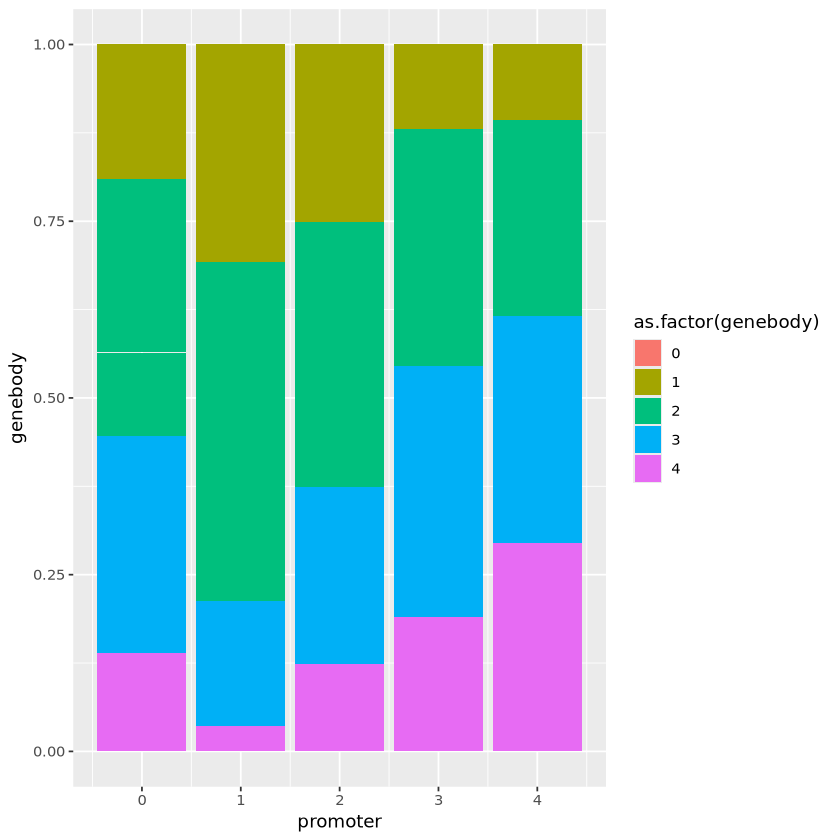

In [17]:
full_anno_table %>%
    filter(tf=="AT1G01060") %>%
    select(gene,n_cons_species_minfrac0,file) %>%
    group_by(gene,file) %>%
    slice_max(n_cons_species_minfrac0,n=1) %>%
    ungroup()%>%
    unique() %>%
    pivot_wider(names_from = file,values_from =n_cons_species_minfrac0) %>%
    replace(is.na(.), 0) %>%
    ggplot(aes(x=promoter,y=genebody,fill=as.factor(genebody)))+
    geom_col(position = "fill")